<a href="https://colab.research.google.com/github/priyansh987/Covid-19-Effect-on-Liver-Cancer-using-SVM/blob/main/Source_Code/Set_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('covid-liver.csv',encoding='cp1252')

In [ ]:
df.sample(5)

,Cancer,Year,Month,Bleed,Mode_Presentation,Age,Gender,Etiology,Cirrhosis,Size,...,Surveillance_programme,Surveillance_effectiveness,Mode_of_surveillance_detection,Time_diagnosis_1st_Tx,Date_incident_surveillance_scan,PS,Time_MDM_1st_treatment,Time_decisiontotreat_1st_treatment,Prev_known_cirrhosis,Months_from_last_surveillance
154,Y,Prepandemic,11,N,Incidental,84,F,NAFLD,Y,40.0,...,N,NaN,NaN,NaN,NaN,1.0,NaN,NaN,N,NaN
38,Y,Prepandemic,3,N,Incidental,75,M,ARLD,Y,94.0,...,N,NaN,NaN,3.13,NaN,1.0,2.67,NaN,Y,NaN
323,N,Prepandemic,2,NaN,Symptomatic,68,M,NaN,NaN,14.0,...,NaN,NaN,NaN,1.50,NaN,0.0,1.50,1.5,Y,NaN
405,N,Pandemic,4,NaN,Incidental,70,M,NaN,NaN,26.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Y,NaN
146,Y,Prepandemic,10,N,Symptomatic,62,F,No established CLD,N,107.0,...,N,NaN,NaN,1.30,NaN,0.0,1.07,NaN,N,NaN


In [ ]:
df.dtypes

Cancer                                 object
Year                                   object
Month                                   int64
Bleed                                  object
Mode_Presentation                      object
Age                                     int64
Gender                                 object
Etiology                               object
Cirrhosis                              object
Size                                  float64
HCC_TNM_Stage                          object
HCC_BCLC_Stage                         object
ICC_TNM_Stage                          object
Treatment_grps                         object
Survival_fromMDM                      float64
Alive_Dead                             object
Type_of_incidental_finding             object
Surveillance_programme                 object
Surveillance_effectiveness             object
Mode_of_surveillance_detection         object
Time_diagnosis_1st_Tx                 float64
Date_incident_surveillance_scan   

In [ ]:
df.shape

(450, 27)

In [ ]:
df.isnull().sum(axis = 0)

Cancer                                  0
Year                                    0
Month                                   0
Bleed                                 140
Mode_Presentation                       0
Age                                     0
Gender                                  0
Etiology                              139
Cirrhosis                             139
Size                                   50
HCC_TNM_Stage                         139
HCC_BCLC_Stage                        139
ICC_TNM_Stage                         311
Treatment_grps                          2
Survival_fromMDM                        0
Alive_Dead                              0
Type_of_incidental_finding            326
Surveillance_programme                139
Surveillance_effectiveness            333
Mode_of_surveillance_detection        352
Time_diagnosis_1st_Tx                 292
Date_incident_surveillance_scan       417
PS                                      2
Time_MDM_1st_treatment            

In [ ]:
df.isnull().sum()/len(df)*100

Cancer                                 0.000000
Year                                   0.000000
Month                                  0.000000
Bleed                                 31.111111
Mode_Presentation                      0.000000
Age                                    0.000000
Gender                                 0.000000
Etiology                              30.888889
Cirrhosis                             30.888889
Size                                  11.111111
HCC_TNM_Stage                         30.888889
HCC_BCLC_Stage                        30.888889
ICC_TNM_Stage                         69.111111
Treatment_grps                         0.444444
Survival_fromMDM                       0.000000
Alive_Dead                             0.000000
Type_of_incidental_finding            72.444444
Surveillance_programme                30.888889
Surveillance_effectiveness            74.000000
Mode_of_surveillance_detection        78.222222
Time_diagnosis_1st_Tx                 64

In [ ]:
li=[]
for i in df.columns:
    n=df[i].isnull().sum()/len(df)*100
    if n>35:
        li.append(i)
li

['ICC_TNM_Stage',
 'Type_of_incidental_finding',
 'Surveillance_effectiveness',
 'Mode_of_surveillance_detection',
 'Time_diagnosis_1st_Tx',
 'Date_incident_surveillance_scan',
 'Time_MDM_1st_treatment',
 'Time_decisiontotreat_1st_treatment',
 'Months_from_last_surveillance']

In [ ]:
df.drop(li,axis=1,inplace=True)

In [ ]:
df.isnull().sum()/len(df)*100

Cancer                     0.000000
Year                       0.000000
Month                      0.000000
Bleed                     31.111111
Mode_Presentation          0.000000
Age                        0.000000
Gender                     0.000000
Etiology                  30.888889
Cirrhosis                 30.888889
Size                      11.111111
HCC_TNM_Stage             30.888889
HCC_BCLC_Stage            30.888889
Treatment_grps             0.444444
Survival_fromMDM           0.000000
Alive_Dead                 0.000000
Surveillance_programme    30.888889
PS                         0.444444
Prev_known_cirrhosis       1.111111
dtype: float64

In [ ]:
df.shape

(450, 18)

In [ ]:
cat_null=[]
num_null=[]
for i in df.columns:
    n=df[i].isnull().sum()/len(df)*100
    if n>0 and df[i].dtype=='object':
        cat_null.append(i)
    elif  n>0 and (df[i].dtype=='int' or df[i].dtype=='float'):
        num_null.append(i)

In [ ]:
num_null

['Size', 'PS']

In [ ]:
cat_null

['Bleed',
 'Etiology',
 'Cirrhosis',
 'HCC_TNM_Stage',
 'HCC_BCLC_Stage',
 'Treatment_grps',
 'Surveillance_programme',
 'Prev_known_cirrhosis']

In [ ]:
size_mean=df['Size'].mean()
df['Size'].fillna(value=size_mean,inplace=True)
df['PS'].fillna(method='ffill',inplace=True)

In [ ]:
df.isnull().sum()/len(df)*100

Cancer                     0.000000
Year                       0.000000
Month                      0.000000
Bleed                     31.111111
Mode_Presentation          0.000000
Age                        0.000000
Gender                     0.000000
Etiology                  30.888889
Cirrhosis                 30.888889
Size                       0.000000
HCC_TNM_Stage             30.888889
HCC_BCLC_Stage            30.888889
Treatment_grps             0.444444
Survival_fromMDM           0.000000
Alive_Dead                 0.000000
Surveillance_programme    30.888889
PS                         0.000000
Prev_known_cirrhosis       1.111111
dtype: float64

In [ ]:
for i in cat_null:
  print(f'{i}:{df[i].unique()}')

Bleed:['N' nan 'Y']
Etiology:['NAFLD' 'ARLD' 'HCV' 'No established CLD' 'PBC/AIH' 'HH' 'HBV' 'Other'
 nan]
Cirrhosis:['Y' 'N' nan]
HCC_TNM_Stage:['II' 'I' 'IV' 'IIIA+IIIB' nan]
HCC_BCLC_Stage:['A' 'D' 'B' 'C' '0' nan]
Treatment_grps:['Ablation' 'Supportive care' 'Medical' 'TACE' 'SIRT' 'OLTx' 'Resection'
 nan]
Surveillance_programme:['Y' 'N' nan]
Prev_known_cirrhosis:['Y' 'N' nan]


In [ ]:
yes_no_cols=['Bleed','Cirrhosis','Surveillance_programme','Prev_known_cirrhosis']
for i in yes_no_cols:
  df[i].replace({'Y':1,'N':0},inplace=True)

In [ ]:
for i in cat_null:
  print(f'{i}:{df[i].unique()}')

Bleed:[ 0. nan  1.]
Etiology:['NAFLD' 'ARLD' 'HCV' 'No established CLD' 'PBC/AIH' 'HH' 'HBV' 'Other'
 nan]
Cirrhosis:[ 1.  0. nan]
HCC_TNM_Stage:['II' 'I' 'IV' 'IIIA+IIIB' nan]
HCC_BCLC_Stage:['A' 'D' 'B' 'C' '0' nan]
Treatment_grps:['Ablation' 'Supportive care' 'Medical' 'TACE' 'SIRT' 'OLTx' 'Resection'
 nan]
Surveillance_programme:[ 1.  0. nan]
Prev_known_cirrhosis:[ 1.  0. nan]


In [ ]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))
for i in cat_null:
  print(f'{i}:{df[i].unique()}')

Bleed:[0. 1.]
Etiology:['NAFLD' 'ARLD' 'HCV' 'No established CLD' 'PBC/AIH' 'HH' 'HBV' 'Other']
Cirrhosis:[1. 0.]
HCC_TNM_Stage:['II' 'I' 'IV' 'IIIA+IIIB']
HCC_BCLC_Stage:['A' 'D' 'B' 'C' '0']
Treatment_grps:['Ablation' 'Supportive care' 'Medical' 'TACE' 'SIRT' 'OLTx' 'Resection']
Surveillance_programme:[1. 0.]
Prev_known_cirrhosis:[1. 0.]


In [ ]:
for i in cat_null:
  if df[i].dtypes=='float64':
    df[i]=df[i].astype(int)

In [ ]:
for i in cat_null:
  print(f'{i}:{df[i].dtypes}')

Bleed:int64
Etiology:object
Cirrhosis:int64
HCC_TNM_Stage:object
HCC_BCLC_Stage:object
Treatment_grps:object
Surveillance_programme:int64
Prev_known_cirrhosis:int64


In [ ]:
for i in num_null:
  if df[i].dtypes=='float64':
    df[i]=df[i].astype(int)

In [ ]:
df.dtypes

Cancer                     object
Year                       object
Month                       int64
Bleed                       int64
Mode_Presentation          object
Age                         int64
Gender                     object
Etiology                   object
Cirrhosis                   int64
Size                        int64
HCC_TNM_Stage              object
HCC_BCLC_Stage             object
Treatment_grps             object
Survival_fromMDM          float64
Alive_Dead                 object
Surveillance_programme      int64
PS                          int64
Prev_known_cirrhosis        int64
dtype: object

In [ ]:
df.isnull().sum()/len(df)*100

Cancer                    0.0
Year                      0.0
Month                     0.0
Bleed                     0.0
Mode_Presentation         0.0
Age                       0.0
Gender                    0.0
Etiology                  0.0
Cirrhosis                 0.0
Size                      0.0
HCC_TNM_Stage             0.0
HCC_BCLC_Stage            0.0
Treatment_grps            0.0
Survival_fromMDM          0.0
Alive_Dead                0.0
Surveillance_programme    0.0
PS                        0.0
Prev_known_cirrhosis      0.0
dtype: float64

In [ ]:
df=pd.get_dummies(data=df,columns=['Etiology','HCC_TNM_Stage','HCC_BCLC_Stage','Treatment_grps','Mode_Presentation'])

In [ ]:
df['Alive_Dead'].replace({'Alive':1,'Dead':0},inplace=True)
df['Gender'].replace({'M':1,'F':0},inplace=True)
df['Year'].replace({'Prepandemic':1,'Pandemic':0},inplace=True)
df['Cancer'].replace({'Y':1,'N':0},inplace=True)

In [ ]:
df

,Cancer,Year,Month,Bleed,Age,Gender,Cirrhosis,Size,Survival_fromMDM,Alive_Dead,...,Treatment_grps_Ablation,Treatment_grps_Medical,Treatment_grps_OLTx,Treatment_grps_Resection,Treatment_grps_SIRT,Treatment_grps_Supportive care,Treatment_grps_TACE,Mode_Presentation_Incidental,Mode_Presentation_Surveillance,Mode_Presentation_Symptomatic
0,1,1,1,0,68,1,1,22,32.73,1,...,1,0,0,0,0,0,0,0,1,0
1,1,1,1,0,70,1,1,40,3.03,0,...,0,0,0,0,0,1,0,0,1,0
2,1,1,1,0,64,1,1,52,14.97,0,...,0,1,0,0,0,0,0,0,1,0
3,1,1,1,0,73,1,1,80,1.40,0,...,0,0,0,0,0,1,0,1,0,0
4,1,1,1,0,66,0,1,60,32.50,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,12,0,72,0,1,53,1.20,0,...,0,0,0,0,0,1,0,0,0,1
446,0,0,12,0,63,1,1,75,9.67,1,...,0,1,0,0,0,0,0,0,0,1
447,0,0,12,0,79,0,1,63,1.47,0,...,0,0,0,0,0,1,0,0,0,1
448,0,0,12,0,84,0,1,65,1.67,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
cols_to_scale=['Month','Size','Age','Survival_fromMDM']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [ ]:
df

,Cancer,Year,Month,Bleed,Age,Gender,Cirrhosis,Size,Survival_fromMDM,Alive_Dead,...,Treatment_grps_Ablation,Treatment_grps_Medical,Treatment_grps_OLTx,Treatment_grps_Resection,Treatment_grps_SIRT,Treatment_grps_Supportive care,Treatment_grps_TACE,Mode_Presentation_Incidental,Mode_Presentation_Surveillance,Mode_Presentation_Symptomatic
0,1,1,0.0,0,0.594203,1,1,0.057143,0.998780,1,...,1,0,0,0,0,0,0,0,1,0
1,1,1,0.0,0,0.623188,1,1,0.142857,0.093293,0,...,0,0,0,0,0,1,0,0,1,0
2,1,1,0.0,0,0.536232,1,1,0.200000,0.457317,0,...,0,1,0,0,0,0,0,0,1,0
3,1,1,0.0,0,0.666667,1,1,0.333333,0.043598,0,...,0,0,0,0,0,1,0,1,0,0
4,1,1,0.0,0,0.565217,0,1,0.238095,0.991768,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,1.0,0,0.652174,0,1,0.204762,0.037500,0,...,0,0,0,0,0,1,0,0,0,1
446,0,0,1.0,0,0.521739,1,1,0.309524,0.295732,1,...,0,1,0,0,0,0,0,0,0,1
447,0,0,1.0,0,0.753623,0,1,0.252381,0.045732,0,...,0,0,0,0,0,1,0,0,0,1
448,0,0,1.0,0,0.826087,0,1,0.261905,0.051829,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
count=0;
for column in df:
  print(f'{column}')
  count=count+1;
  print(count)


Cancer
1
Year
2
Month
3
Bleed
4
Age
5
Gender
6
Cirrhosis
7
Size
8
Survival_fromMDM
9
Alive_Dead
10
Surveillance_programme
11
PS
12
Prev_known_cirrhosis
13
Etiology_ARLD
14
Etiology_HBV
15
Etiology_HCV
16
Etiology_HH
17
Etiology_NAFLD
18
Etiology_No established CLD
19
Etiology_Other
20
Etiology_PBC/AIH
21
HCC_TNM_Stage_I
22
HCC_TNM_Stage_II
23
HCC_TNM_Stage_IIIA+IIIB
24
HCC_TNM_Stage_IV
25
HCC_BCLC_Stage_0
26
HCC_BCLC_Stage_A
27
HCC_BCLC_Stage_B
28
HCC_BCLC_Stage_C
29
HCC_BCLC_Stage_D
30
Treatment_grps_Ablation
31
Treatment_grps_Medical
32
Treatment_grps_OLTx
33
Treatment_grps_Resection
34
Treatment_grps_SIRT
35
Treatment_grps_Supportive care
36
Treatment_grps_TACE
37
Mode_Presentation_Incidental
38
Mode_Presentation_Surveillance
39
Mode_Presentation_Symptomatic
40


In [ ]:
df

,Cancer,Year,Month,Bleed,Age,Gender,Cirrhosis,Size,Survival_fromMDM,Alive_Dead,...,Treatment_grps_Ablation,Treatment_grps_Medical,Treatment_grps_OLTx,Treatment_grps_Resection,Treatment_grps_SIRT,Treatment_grps_Supportive care,Treatment_grps_TACE,Mode_Presentation_Incidental,Mode_Presentation_Surveillance,Mode_Presentation_Symptomatic
0,1,1,0.0,0,0.594203,1,1,0.057143,0.998780,1,...,1,0,0,0,0,0,0,0,1,0
1,1,1,0.0,0,0.623188,1,1,0.142857,0.093293,0,...,0,0,0,0,0,1,0,0,1,0
2,1,1,0.0,0,0.536232,1,1,0.200000,0.457317,0,...,0,1,0,0,0,0,0,0,1,0
3,1,1,0.0,0,0.666667,1,1,0.333333,0.043598,0,...,0,0,0,0,0,1,0,1,0,0
4,1,1,0.0,0,0.565217,0,1,0.238095,0.991768,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,1.0,0,0.652174,0,1,0.204762,0.037500,0,...,0,0,0,0,0,1,0,0,0,1
446,0,0,1.0,0,0.521739,1,1,0.309524,0.295732,1,...,0,1,0,0,0,0,0,0,0,1
447,0,0,1.0,0,0.753623,0,1,0.252381,0.045732,0,...,0,0,0,0,0,1,0,0,0,1
448,0,0,1.0,0,0.826087,0,1,0.261905,0.051829,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **FEATURE SELECTION**

In [ ]:
Y1=df['Cancer']
X1=df.drop('Cancer',axis=1)

In [ ]:
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.25,random_state=0)
X1_train.shape,X1_test.shape

((337, 39), (113, 39))

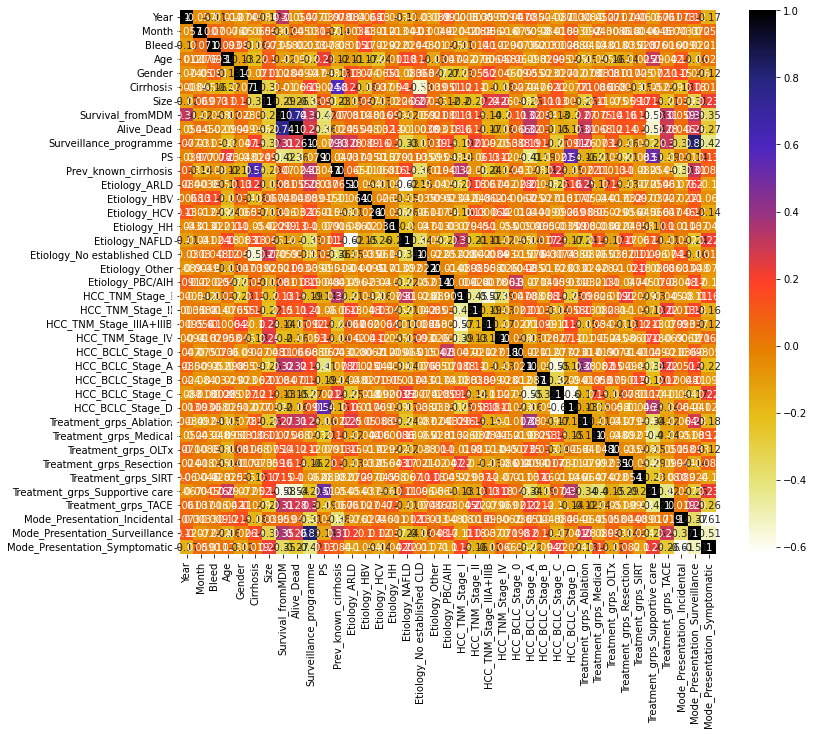

In [ ]:
plt.figure(figsize=(12,10))
cor=X1_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset,threshold):
    corr_col=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                corr_col.add(colname)
    return corr_col

In [ ]:
corr_features=correlation(X1_train,0.8)
corr_features

{'Mode_Presentation_Surveillance'}

In [ ]:
df.drop('Mode_Presentation_Surveillance',axis=1,inplace=True)

In [ ]:
lab=[]
li=[]
for i in (X1_train.columns):
    lab.append(i)
    li.append(X1_train[i].corr(Y1_train))
    #print(X_train[i].corr(Y_train))
diction=dict(zip(lab,li))
print(diction)

{'Year': 0.06802369842520864, 'Month': 0.10982462909663342, 'Bleed': 0.09183106037186681, 'Age': 0.039422563355857955, 'Gender': 0.164602031645537, 'Cirrhosis': -0.34293063779306543, 'Size': 0.01688955311044735, 'Survival_fromMDM': 0.15935565985479563, 'Alive_Dead': 0.20113559639393397, 'Surveillance_programme': 0.4068290190332809, 'PS': 0.038151744208153045, 'Prev_known_cirrhosis': -0.5337769460807164, 'Etiology_ARLD': 0.3555259307683877, 'Etiology_HBV': 0.08370356034016511, 'Etiology_HCV': 0.14721283098746982, 'Etiology_HH': 0.11298279225955432, 'Etiology_NAFLD': -0.5585333529089256, 'Etiology_No established CLD': 0.19307261473249632, 'Etiology_Other': 0.05270120740095527, 'Etiology_PBC/AIH': 0.08941663798195729, 'HCC_TNM_Stage_I': -0.5927360717255497, 'HCC_TNM_Stage_II': 0.26431420190557375, 'HCC_TNM_Stage_IIIA+IIIB': 0.33976879512175007, 'HCC_TNM_Stage_IV': 0.2284789083602768, 'HCC_BCLC_Stage_0': 0.03720988537147335, 'HCC_BCLC_Stage_A': 0.26431420190557386, 'HCC_BCLC_Stage_B': 0.15

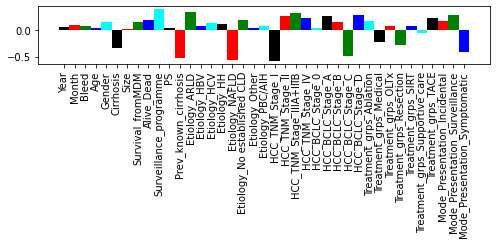

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.bar(lab, li,width=1,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xticks(rotation=90)
plt.show()

# MODEL **TRAINING**

In [ ]:
import numpy as np
copydf = df.copy(deep=False)
copydf.drop(['Cancer'],axis=1,inplace=True)
d=[]
for i in copydf:
  d.append(copydf[i])

In [ ]:
X=np.array(d)
Y=np.array(df['Cancer'])

In [ ]:
X=X.transpose()
X.shape

(450, 38)

In [ ]:
#train the CNN
#history=model.fit(x_train,y_train,validation_data=(x_validation,y_validation),batch_size=32,epochs=50)

In [ ]:
# Split dataset into training and testing set
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=109)

In [ ]:
# Import svm model
from sklearn import svm

In [ ]:
clf=svm.SVC(kernel="linear")

In [ ]:
clf.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
#Predict the response from the dataset
y_pred=clf.predict(X_test)

In [ ]:
#importing scikit learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
#How often is the classifier correct"
print("Accuracy :- ",metrics.accuracy_score(Y_test,y_pred))

Accuracy :-  0.9851851851851852


In [ ]:
df

,Cancer,Year,Month,Bleed,Age,Gender,Cirrhosis,Size,Survival_fromMDM,Alive_Dead,...,HCC_BCLC_Stage_D,Treatment_grps_Ablation,Treatment_grps_Medical,Treatment_grps_OLTx,Treatment_grps_Resection,Treatment_grps_SIRT,Treatment_grps_Supportive care,Treatment_grps_TACE,Mode_Presentation_Incidental,Mode_Presentation_Symptomatic
0,1,1,0.0,0,0.594203,1,1,0.057143,0.998780,1,...,0,1,0,0,0,0,0,0,0,0
1,1,1,0.0,0,0.623188,1,1,0.142857,0.093293,0,...,1,0,0,0,0,0,1,0,0,0
2,1,1,0.0,0,0.536232,1,1,0.200000,0.457317,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0.0,0,0.666667,1,1,0.333333,0.043598,0,...,0,0,0,0,0,0,1,0,1,0
4,1,1,0.0,0,0.565217,0,1,0.238095,0.991768,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,1.0,0,0.652174,0,1,0.204762,0.037500,0,...,0,0,0,0,0,0,1,0,0,1
446,0,0,1.0,0,0.521739,1,1,0.309524,0.295732,1,...,0,0,1,0,0,0,0,0,0,1
447,0,0,1.0,0,0.753623,0,1,0.252381,0.045732,0,...,0,0,0,0,0,0,1,0,0,1
448,0,0,1.0,0,0.826087,0,1,0.261905,0.051829,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
#confusion matrix

In [ ]:
# Creating some predictions.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_train, Y_train, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, y_train_pred)

array([[ 97,   1],
       [  1, 216]])

In [ ]:
#true negative =97
#false negative =1
#false postive=1  type 1 error
#true positive=216 type 2 error